
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---
## Trabajo práctico entregable - Parte 1

In [2]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

seaborn.set_context('talk')

In [3]:
def clean_outliers_q3(dataset, column_name, q_ =.75):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(q_)))
    return dataset[mask_outlier]

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [4]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)

In [5]:
df[:3]
#print(df.keys())



,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,salary_%_cripto,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment,salary_percentage_inflation_adjustment,salary_month_last_inflation_adjustment,salary_comparison_last_semester,salary_benefit,salary_satisfaction,Trabajo de,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,company_employee_number,work_work_modality,Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,NaN,No,No recibo bono,No,0,No tuve,2,"Abono de Internet, Clases de idiomas, Crédito ...",2,Infosec,10.0,0.0,0.0,0.0,"Amazon Web Services, Linux, VMWare",Python,Ninguno de los anteriores,ElasticSearch,"Postman, Visual Studio Coded UI",De 101 a 200 personas,100% remoto,0,8,Universitario,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,NaN,No,No recibo bono,No,0,No tuve,4,"Capacitaciones y/o cursos, Clases de idiomas, ...",4,Developer,2.0,2.0,2.0,0.0,Amazon Web Services,"CSS, HTML, Java, Javascript, SQL, TypeScript",React.js,PostgreSQL,Cypress,De 51 a 100 personas,100% remoto,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,NaN,Un sueldo,Performance de la compañía,Dos,20,Marzo,2,Horarios flexibles,1,Developer,2.0,1.6,1.6,0.0,Amazon Web Services,"Javascript, PHP, Python","Flask, Laravel, Vue.js",MariaDB,Ninguna de las anteriores,De 11 a 50 personas,100% remoto,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis


# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

5358
5358
antes salary_monthly_BRUTO           4374
salary_monthly_NETO            4374
tools_programming_languages    4372
dtype: int64
despues salary_monthly_BRUTO           3827
salary_monthly_NETO            3827
tools_programming_languages    3825
dtype: int64
min:  57800.0 max:  593092.04
3827


/tmp/ipykernel_13374/2722145551.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[df["salary_monthly_BRUTO"]>1e4]     #minimo: 10000
/tmp/ipykernel_13374/2722145551.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[df["salary_monthly_BRUTO"]>df["salary_monthly_NETO"]]


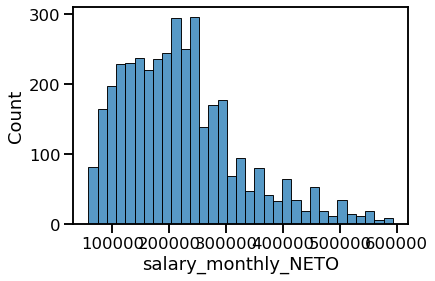

3825


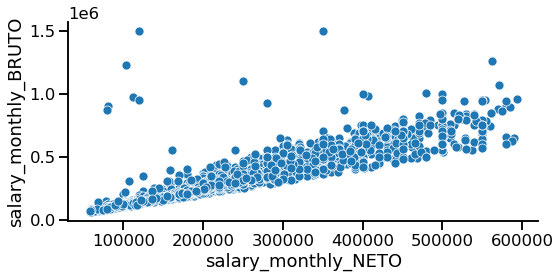

In [6]:
# complete here if you want to include more columns
relevant_columns = ["salary_monthly_BRUTO","salary_monthly_NETO","tools_programming_languages"]

df1 = df[relevant_columns]
print(df1["salary_monthly_BRUTO"].count())
df1 = df1[df["salary_monthly_BRUTO"]!=np.NaN]
df1 = df1[df["salary_monthly_BRUTO"]!=""]
print(df1["salary_monthly_BRUTO"].count())

#filtro los que tienen bruto mayor que neto
df1=df1[df["salary_monthly_BRUTO"]<2*1e6]   #maximo: dos palos
df1=df1[df["salary_monthly_BRUTO"]>1e4]     #minimo: 10000
df1=df1[df["salary_monthly_BRUTO"]>df["salary_monthly_NETO"]]
# df1=df1[df["salary_monthly_NETO"]>0]


#df1 = clean_outliers_q3(df1, "salary_monthly_NETO", q_ =.75)

print("antes",df1.count())
kmax=95
kmin=7.5
percentile_kmax = df1["salary_monthly_NETO"].quantile(kmax / 100)
percentile_kmin = df1["salary_monthly_NETO"].quantile(kmin / 100)

df1 = df1[df1["salary_monthly_NETO"] < percentile_kmax]
df1 = df1[df1["salary_monthly_NETO"] > percentile_kmin]
print("despues",df1.count())

# df1[df1[salary_monthly_BRUTO]<n_below & ]
print("min: ",np.amin(df1["salary_monthly_NETO"]), "max: ",np.amax(df1["salary_monthly_NETO"]))
print(df1["salary_monthly_BRUTO"].count())

seaborn.histplot(df1["salary_monthly_NETO"])
plt.show()

seaborn.pairplot(data=df1, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=2, height=4)


df1 = clean_outliers_q3(df1, "salary_monthly_BRUTO", q_ =.9)
print(df1["salary_monthly_BRUTO"].count())


### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [7]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
    if not isinstance(languages_str, str):
    
        return []
  
    # Remove 'other' option
    languages_str = languages_str.lower().replace('ninguno de los anteriores', '')
    # Split string into list of items
    # Remove spaces and commas for each item
    return [lang.strip().replace(',', '') for lang in languages_str.split()]

# Create a new column with the list of languages
df1.loc[:, 'cured_programming_languages'] = df1.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.

#uso la columna que me interesa
print(df1["cured_programming_languages"])
print("-----------------------------------------------")
#transformo a series. No entiendo por que hay 19 columnas.
df_lang = df1["cured_programming_languages"].apply(pd.Series)
print(df_lang)
print("-----------------------------------------------")
df_lang = df_lang.stack()
print(df_lang)
print("-----------------------------------------------")
df_lang = df_lang.reset_index(level=-1, drop=True)
print(df_lang)
print("-----------------------------------------------")
df_lang = df_lang.to_frame()
print(df_lang)
print("-----------------------------------------------")
df_lang = df_lang.join(df1[relevant_columns])
print(df_lang)
print("-----------------------------------------------")
df_lang = df_lang.rename(columns={0: 'programming_language'})
print(df_lang)

# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python. 

#Esto es una mentira, hacelo linea por linea para que se entienda.



0                        [python]
2       [javascript, php, python]
4         [css, html, javascript]
5                      [go, java]
6                          [java]
                  ...            
5351                [python, sql]
5352                        [sql]
5354                           []
5355                  [html, sql]
5356            [javascript, sql]
Name: cured_programming_languages, Length: 3825, dtype: object
-----------------------------------------------


/tmp/ipykernel_13374/1702447243.py:29: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_lang = df1["cured_programming_languages"].apply(pd.Series)


              0     1           2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19
0         python   NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2     javascript   php      python  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4            css  html  javascript  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5             go  java         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6           java   NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
...          ...   ...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
5351      python   sql         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5352         sql   NaN         NaN  NaN 

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [8]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
print(language_count[:10])
print(np.sum(language_count["frequency"][0:6]/np.sum(language_count["frequency"])))
print(np.sum(language_count["frequency"][6:]/np.sum(language_count["frequency"])))

df_lang_copy = df_lang
lang_list=["sql","javascript","html","python","css","java"]
ii=0

print(df_lang_copy)
for lang in df_lang_copy["programming_language"]:
    if lang not in lang_list:
        df_lang_copy.loc[ii,"programming_language"]="otro"  #esto puede estar mal
    ii+=1

print(df_lang_copy)

#hacer: graficos de cajas por lenguajes
#       histogramas por lenguajes



     language  frequency
0         sql       1535
1  javascript       1481
2        html       1131
3      python       1018
4         css        756
5        java        715
6  bash/shell        620
7  typescript        611
8        .net        488
9         php        430
0.6258606054890125
0.37413939451098743
     programming_language  salary_monthly_BRUTO  salary_monthly_NETO tools_programming_languages cured_programming_languages
0                  python              300000.0             245000.0                      Python                    [python]
2              javascript              120000.0             115000.0     Javascript, PHP, Python   [javascript, php, python]
2                     php              120000.0             115000.0     Javascript, PHP, Python   [javascript, php, python]
2                  python              120000.0             115000.0     Javascript, PHP, Python   [javascript, php, python]
4                     css              140000.0             1

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [9]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,salary_monthly_BRUTO,salary_monthly_NETO,tools_programming_languages,cured_programming_languages
0,python,300000.0,245000.0,Python,[python]
19,python,300000.0,200000.0,"Python, SQL","[python, sql]"
22,python,285000.0,245000.0,Python,[python]
30,python,220000.0,183000.0,"Bash/Shell, Python, SQL","[bash/shell, python, sql]"
37,python,256200.0,212146.0,"HTML, Javascript, PHP, Python, SQL","[html, javascript, php, python, sql]"


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [11]:
print(df.keys())
df2 = df["salary_monthly_NETO", "profile_years_experience", "profile_age", "work_province", "profile_gender"]


# fig = plt.figure(figsize=(6,4))
# ax = fig.add_subplot(111)
# ax.scatter(df_lang["programming_language"], df_lang["salary_monthly_BRUTO"])
# fig.tight_layout()


Index(['work_country', 'work_province', 'work_dedication', 'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO', 'numero', 'salary_in_usd', 'salary_last_dollar_value', 'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus', 'salary_bonus_tied_to', 'salary_inflation_adjustment', 'salary_percentage_inflation_adjustment', 'salary_month_last_inflation_adjustment', 'salary_comparison_last_semester', 'salary_benefit', 'salary_satisfaction', 'Trabajo de', 'profile_years_experience', 'work_years_in_company', 'work_years_in_current_position', 'work_people_in_charge_of', 'tools_platform', 'tools_programming_languages', 'tools_frameworks', 'tools_data_bases', 'tools_qa_testing', 'company_employee_number', 'work_work_modality', 'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?', 'company_recommended', 'profile_studies_level', 'profile_studies_level_state', 'profile_career', 'profile_university', 'profile_boot_camp', 'profile_boot_camp_carrer',
    

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)
